In [1]:
import requests as rq
import json
import pandas as pd
import numpy as np
from textwrap import wrap
from matplotlib import pyplot as plt
from IPython.display import HTML
from sklearn import metrics
from gtex import get_gtex_tissue, makePie, define_labels, get_fraction_sites, get_cluster_given_l, get_clustersinfo
import seaborn as sns

In [182]:
##GTex
L = 4
level=1
setup = 'oversigma_5tissue'
label='secondary_site'
directory = "/Users/filippo/Developer/tesi/gtex/hsbm/%s"%setup

In [183]:
df_files = pd.read_csv("files.dat", index_col=[0])

In [184]:
df_clusters = pd.read_csv("%s/topsbm/topsbm_level_%d_clusters.csv"%(directory, level), header=[0])
df_clusters.head()

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,...,Cluster 22,Cluster 23,Cluster 24,Cluster 25,Cluster 26,Cluster 27,Cluster 28,Cluster 29,Cluster 30,Cluster 31
0,GTEX-1117F-2826-SM-5GZXL,GTEX-11DXY-3226-SM-5GIDE,GTEX-11GSP-2126-SM-5HL5E,GTEX-131XG-1526-SM-5GCNQ,GTEX-11EM3-1526-SM-5A5KN,GTEX-12WSF-0011-R11a-SM-,GTEX-11O72-2226-SM-5PNW2,GTEX-139T6-0006-SM-5LU92,GTEX-11EQ9-0002-SM-5QGQ1,GTEX-11I78-1226-SM-5A5K6,...,GTEX-11EM3-1326-SM-5N9C6,GTEX-12WSJ-0002-SM-5TDBV,GTEX-13FHO-0826-SM-5L3E8,GTEX-13FHP-0011-R1b-SM-5,GTEX-13CF2-0011-R2a-SM-5,GTEX-139T6-1626-SM-5PNYZ,GTEX-11NV4-0011-R7a-SM-5,GTEX-12ZZX-0011-R1a-SM-5,GTEX-12WSD-0011-R6b-SM-5,GTEX-11GS4-1826-SM-5HL4T
1,GTEX-1192X-2326-SM-5987X,GTEX-131YS-0011-R1a-SM-5,GTEX-132QS-1826-SM-5IFFN,GTEX-11PRG-2026-SM-5GU5F,GTEX-11DXZ-1726-SM-5H12M,GTEX-11O72-2826-SM-5HL6W,GTEX-11EQ9-1526-SM-5PNY7,GTEX-12WSJ-0005-SM-5LU8S,GTEX-1122O-0003-SM-5Q5DL,GTEX-11VI4-1426-SM-5GU6O,...,GTEX-12ZZX-1126-SM-5EGKB,GTEX-1269C-0003-SM-5S2PB,GTEX-139TU-0626-SM-5KM3X,GTEX-12WSM-0011-R7b-SM-5,GTEX-131YS-0011-R9b-SM-5,GTEX-11NSD-0926-SM-5N9DR,GTEX-132Q8-0011-R5a-SM-5,GTEX-131XH-0011-R2b-SM-5,GTEX-13CIG-0011-R8b-SM-5,GTEX-131YS-2926-SM-5EGKI
2,GTEX-11EI6-0626-SM-5985T,GTEX-12WSH-3026-SM-5CVNI,GTEX-1122O-1926-SM-5EGIQ,GTEX-13CF3-1326-SM-5LZXZ,GTEX-13113-1426-SM-5EGHU,GTEX-139TT-2626-SM-5LZUB,GTEX-11ONC-1926-SM-5GU75,GTEX-13113-0006-SM-5NQ7X,GTEX-11I78-0001-SM-5Q5BE,GTEX-1211K-1726-SM-5FQUJ,...,GTEX-11WQC-1726-SM-5GU4W,GTEX-11VI4-0001-SM-5S2OI,GTEX-11EQ9-1826-SM-5Q5AJ,GTEX-13CF2-0011-R5a-SM-5,GTEX-13CZV-0011-R9a-SM-5,GTEX-11GSO-1926-SM-5A5K3,GTEX-131YS-0011-R5b-SM-5,GTEX-13112-0011-R8b-SM-6,GTEX-12WSM-0011-R8a-SM-5,GTEX-12KS4-2326-SM-5EGJB
3,GTEX-1314G-1226-SM-5BC6D,GTEX-12ZZX-2926-SM-5GCOQ,GTEX-12WSG-2026-SM-5FQUU,GTEX-11TTK-2426-SM-5PNYO,GTEX-11P82-1026-SM-5BC5J,GTEX-12WSM-0011-R11a-SM-,GTEX-1128S-1626-SM-5H12O,GTEX-12BJ1-0006-SM-5SIB5,GTEX-1212Z-0002-SM-5SI6W,GTEX-11TT1-1026-SM-5PNW7,...,GTEX-139T8-0826-SM-5L3DE,GTEX-12BJ1-0003-SM-5SI6V,NaN,GTEX-13CF2-0011-R1a-SM-5,GTEX-11ZUS-0011-R9b-SM-5,GTEX-11O72-2126-SM-5N9FO,GTEX-131YS-0011-R7a-SM-5,GTEX-11GSP-0011-R8b-SM-5,GTEX-11ZUS-0011-R8a-SM-5,GTEX-11WQK-2126-SM-5EQME
4,GTEX-13D11-1026-SM-5IJFB,GTEX-131YS-0011-R10b-SM-,GTEX-131XF-1226-SM-5HL8V,GTEX-117YX-0826-SM-5H11J,GTEX-1399R-2226-SM-5P9JB,GTEX-12126-0011-R11a-SM-,GTEX-12KS4-2426-SM-5LU8P,GTEX-132AR-0006-SM-5NQ7N,GTEX-12WSL-0002-SM-664MF,GTEX-12BJ1-2126-SM-5BC5O,...,GTEX-133LE-1726-SM-5K7VQ,GTEX-11ZTT-0002-SM-5S2PA,NaN,GTEX-1212Z-0011-R1b-SM-5,GTEX-11PRG-0011-R2a-SM-6,NaN,GTEX-12WSF-0011-R5a-SM-5,GTEX-12WSC-0011-R9a-SM-5,GTEX-11ZTS-0011-R8a-SM-5,GTEX-12WSJ-0926-SM-5P9JD


In [167]:
samples = []
for c in df_clusters.columns.values:
    for sample in df_clusters[c].dropna().values:
        for file in df_files.index.values:
            if sample in file:
                samples.append(file)
                break
df_files.loc[samples,:].to_csv("files.dat.sub",index=True, header=True)

## Clusters

In [185]:
cluster = get_cluster_given_l(level, directory)
fraction_sites = get_fraction_sites(cluster,df_files=df_files,label=label)
clustersinfo = get_clustersinfo(cluster,fraction_sites)

Cluster 1
Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6
Cluster 7


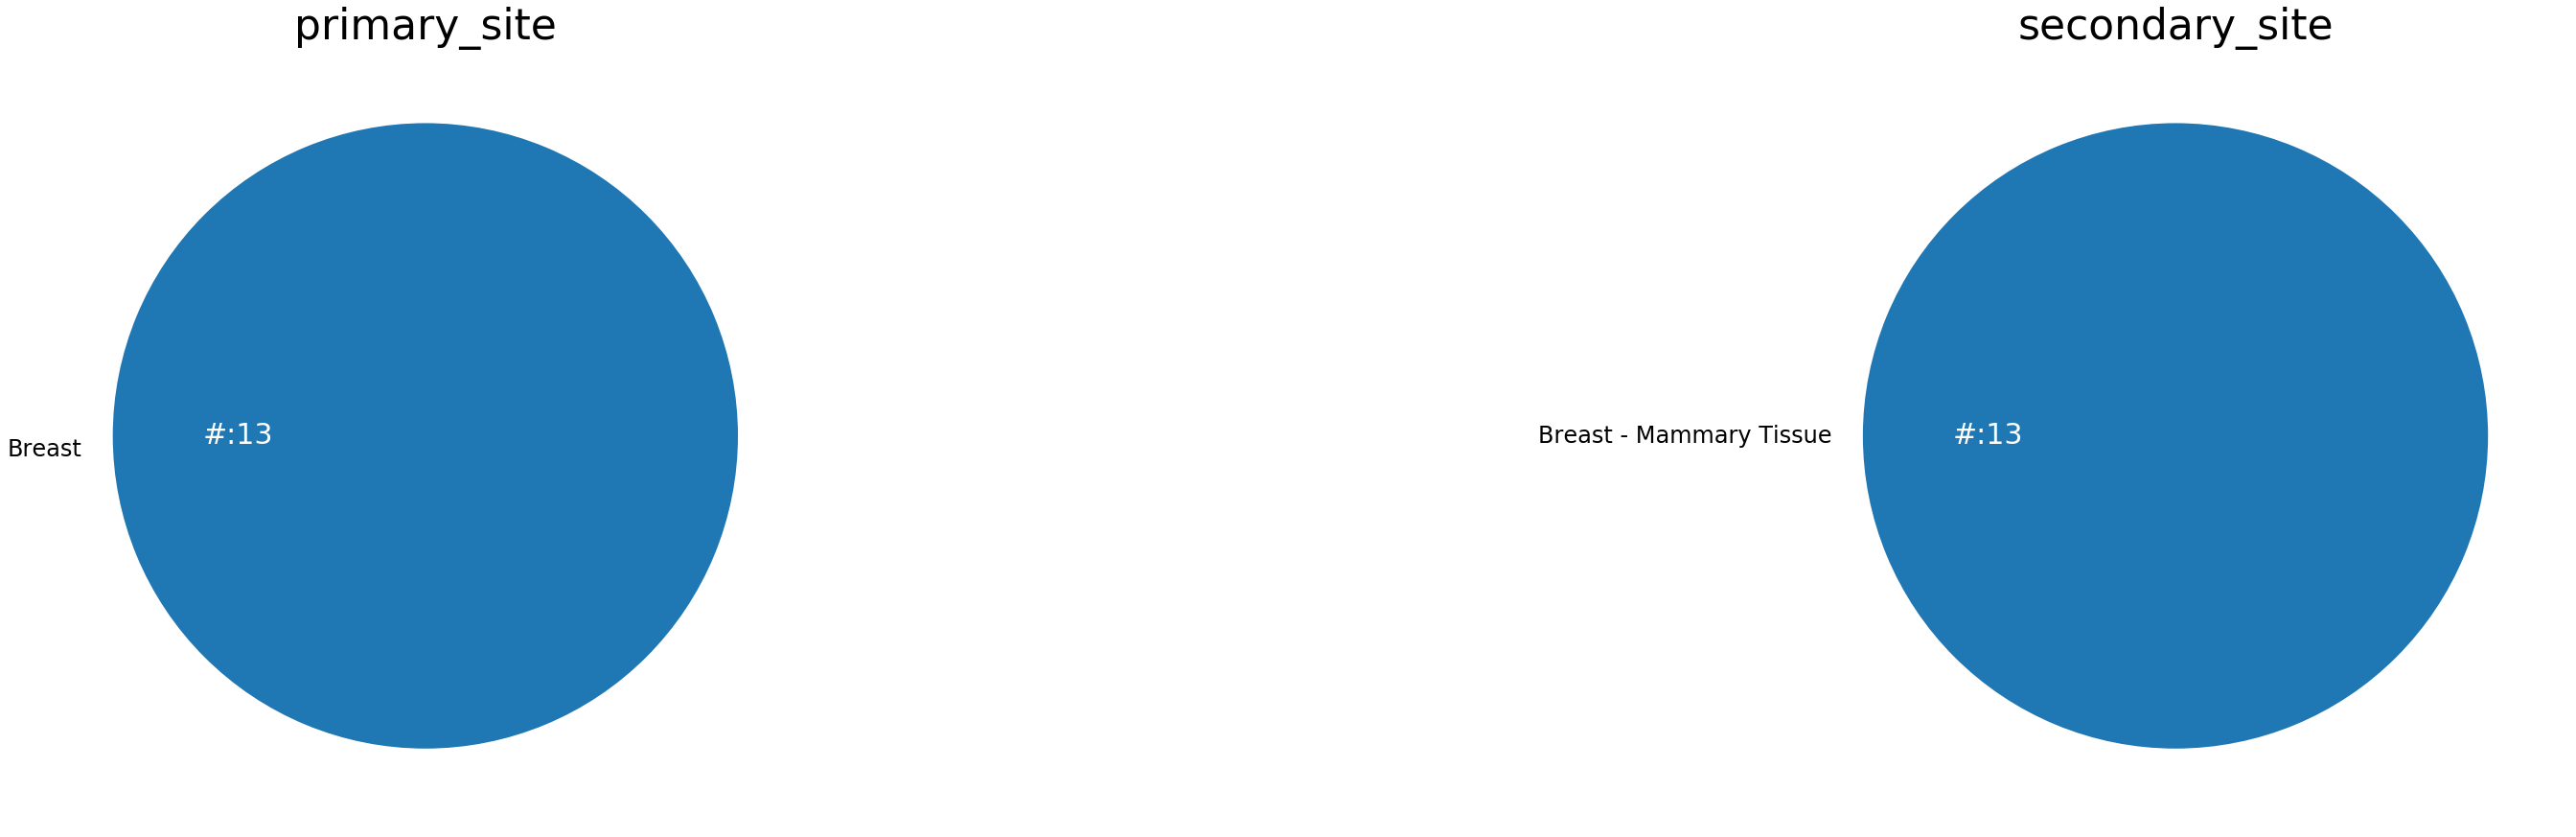

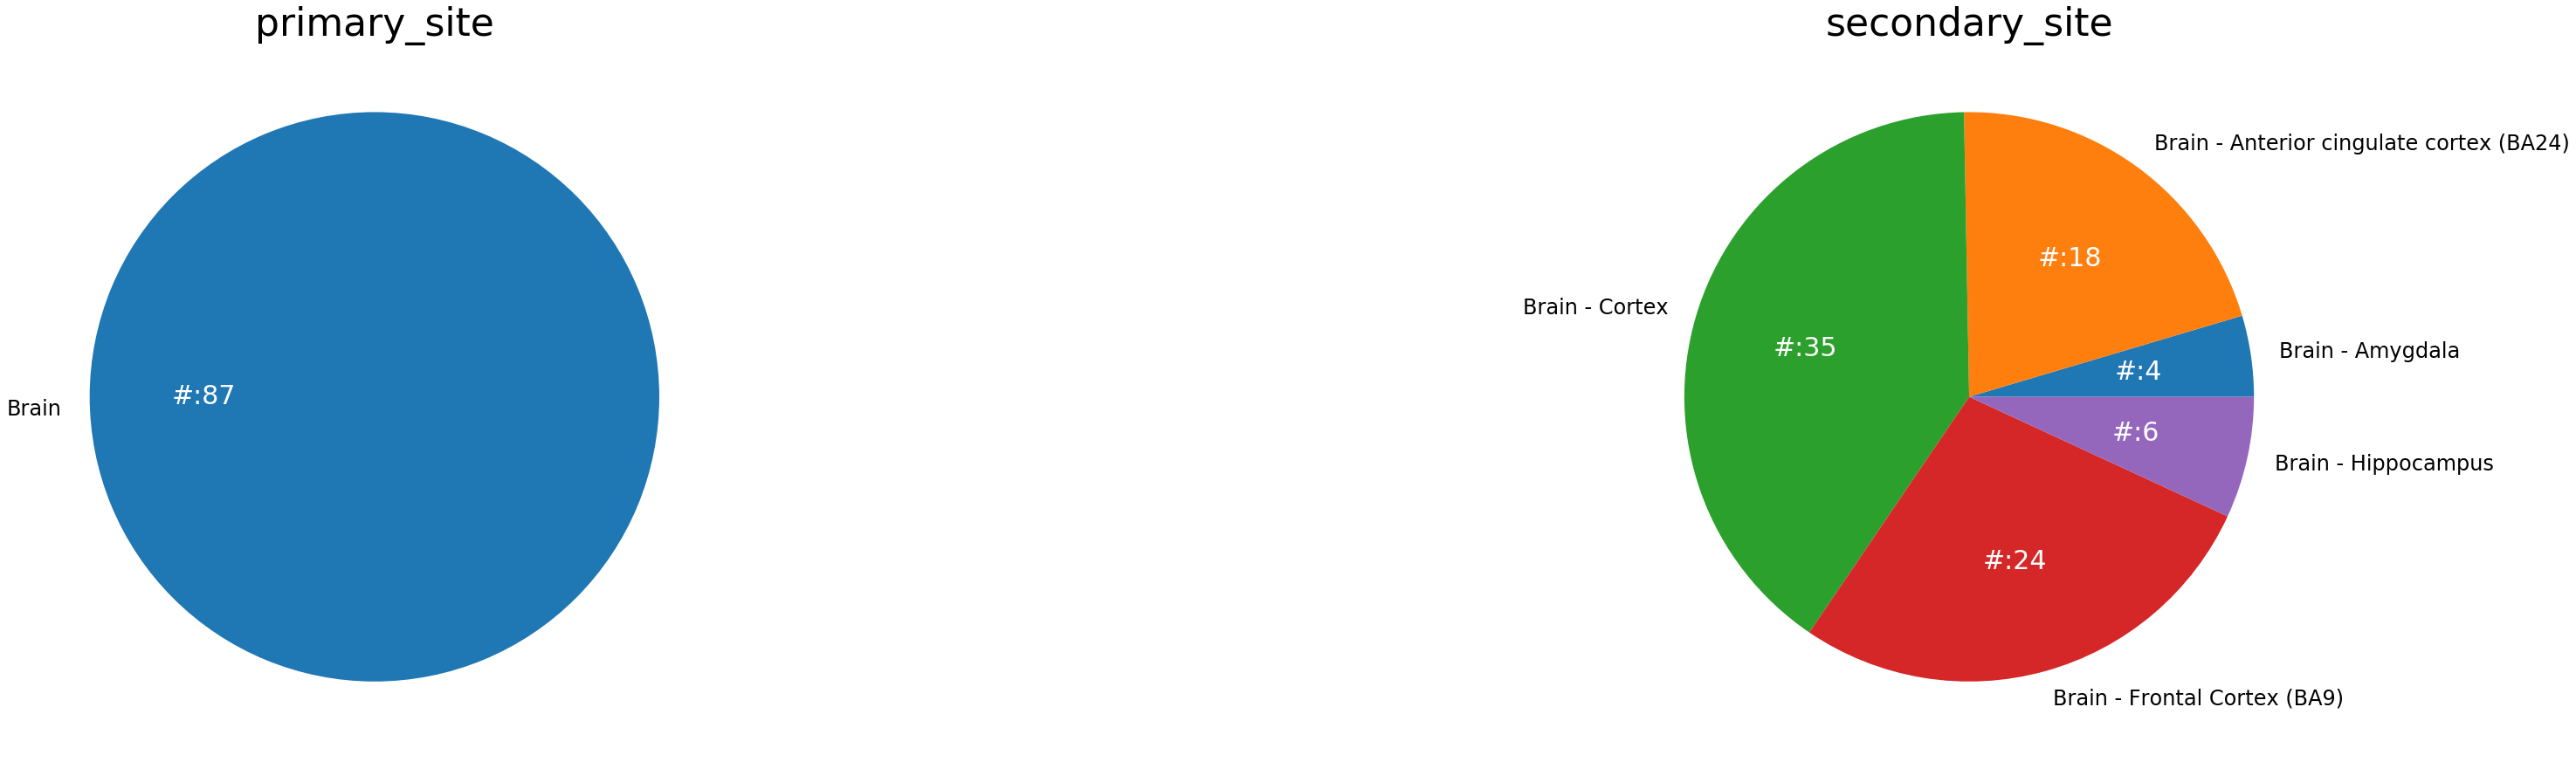

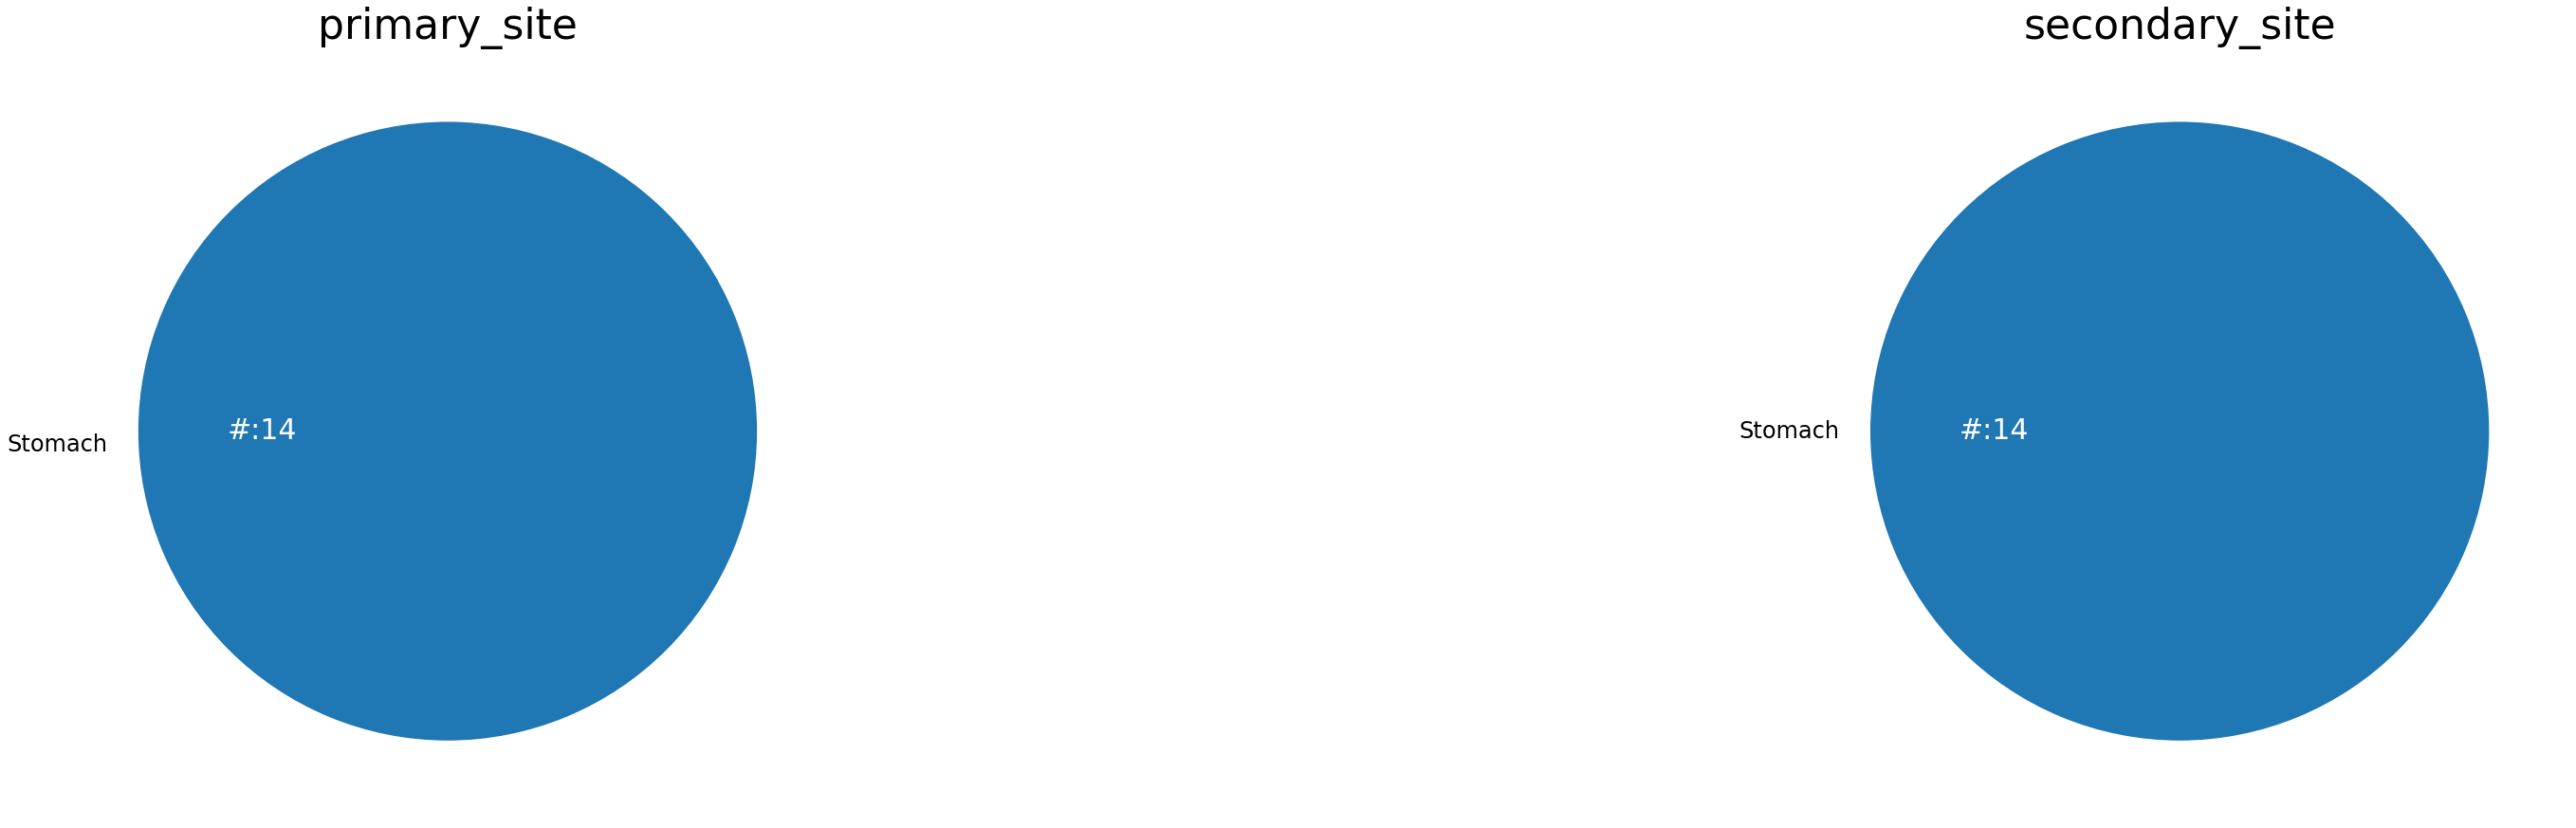

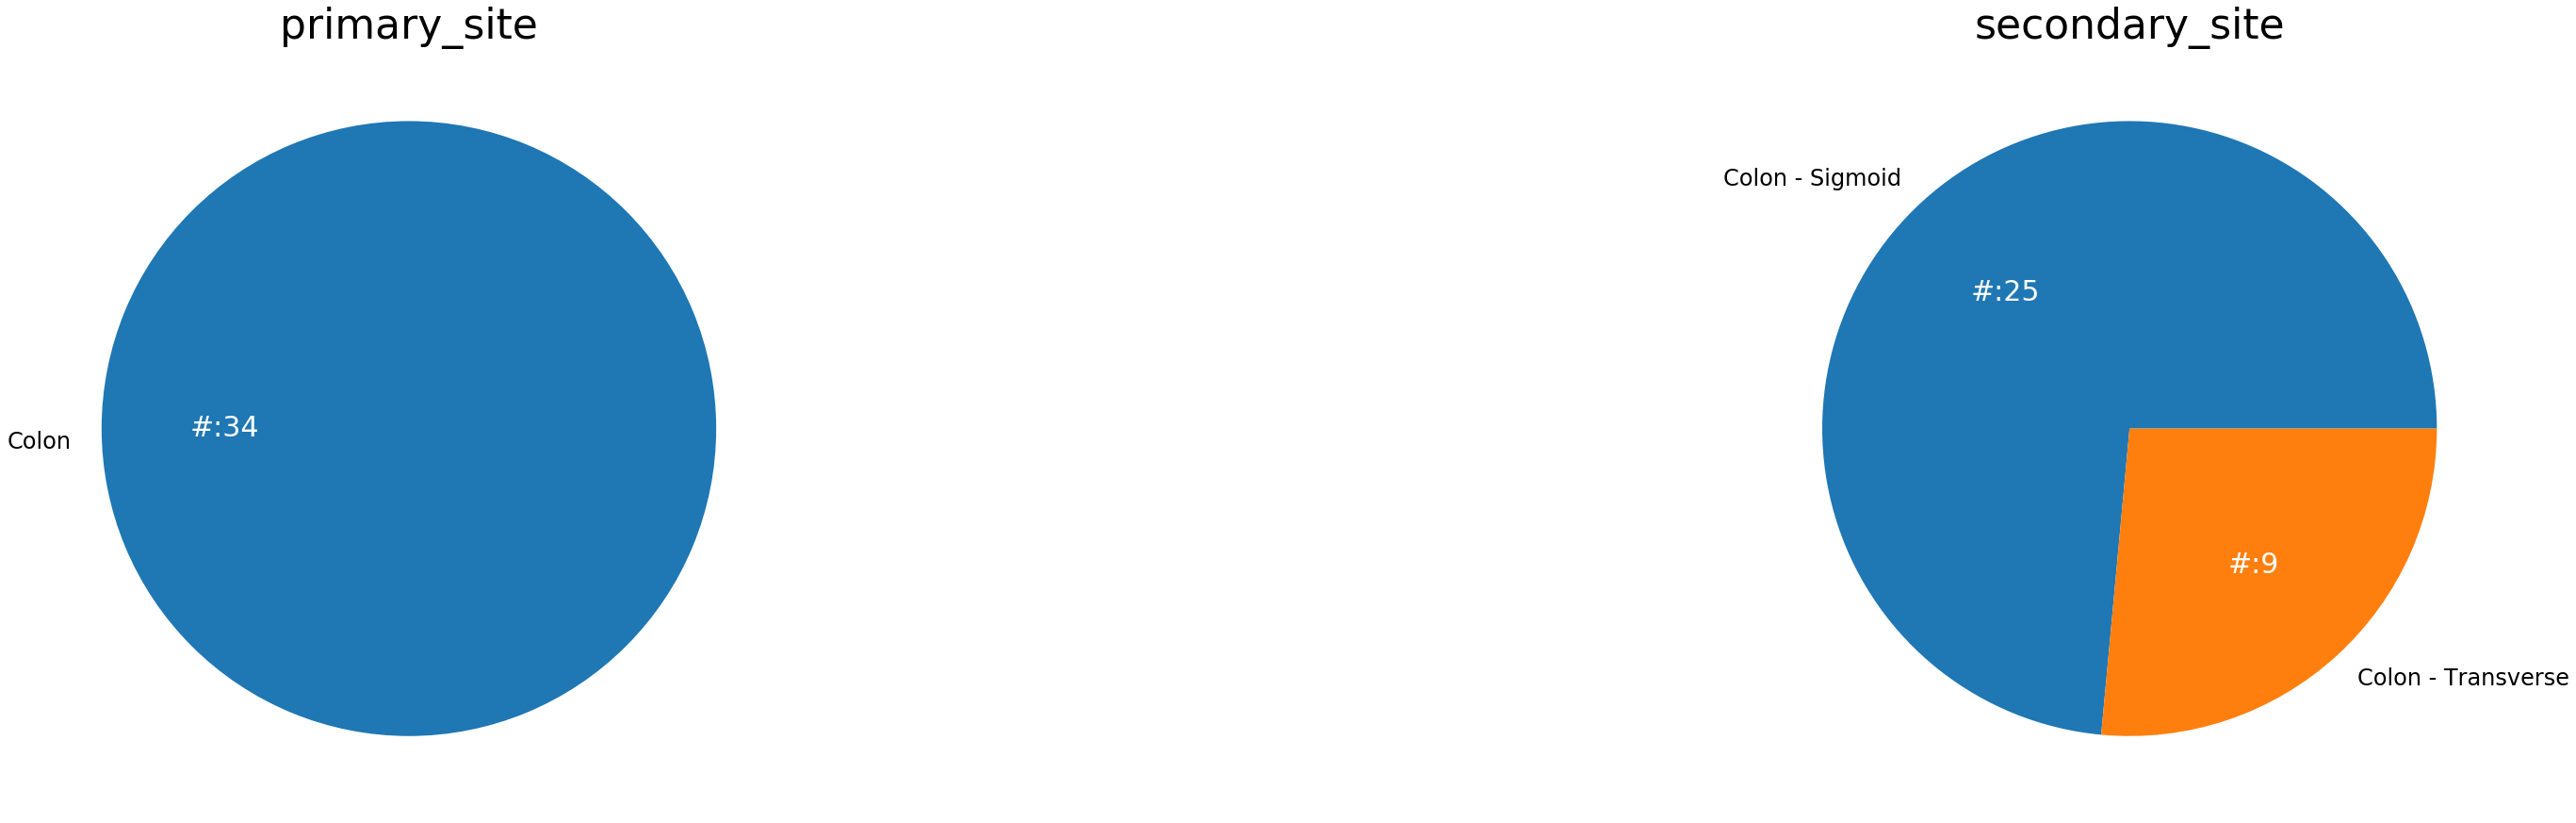

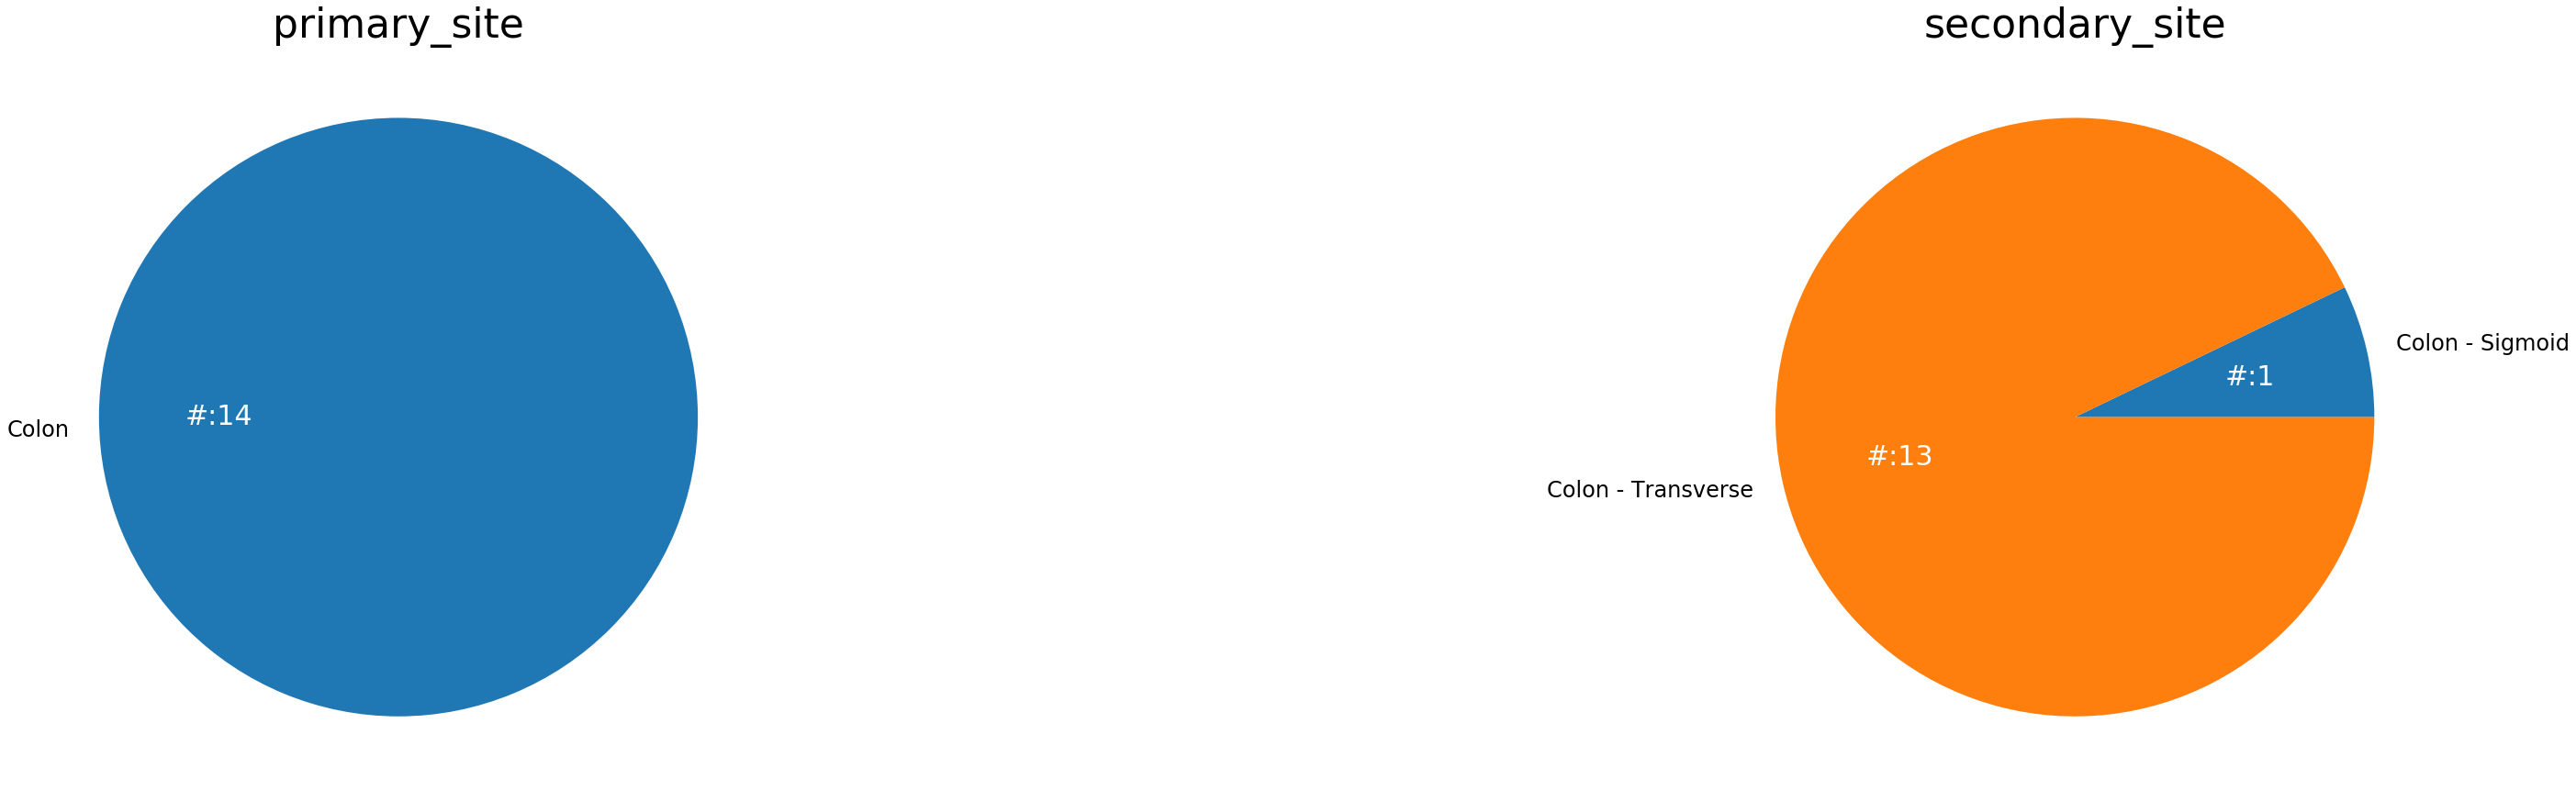

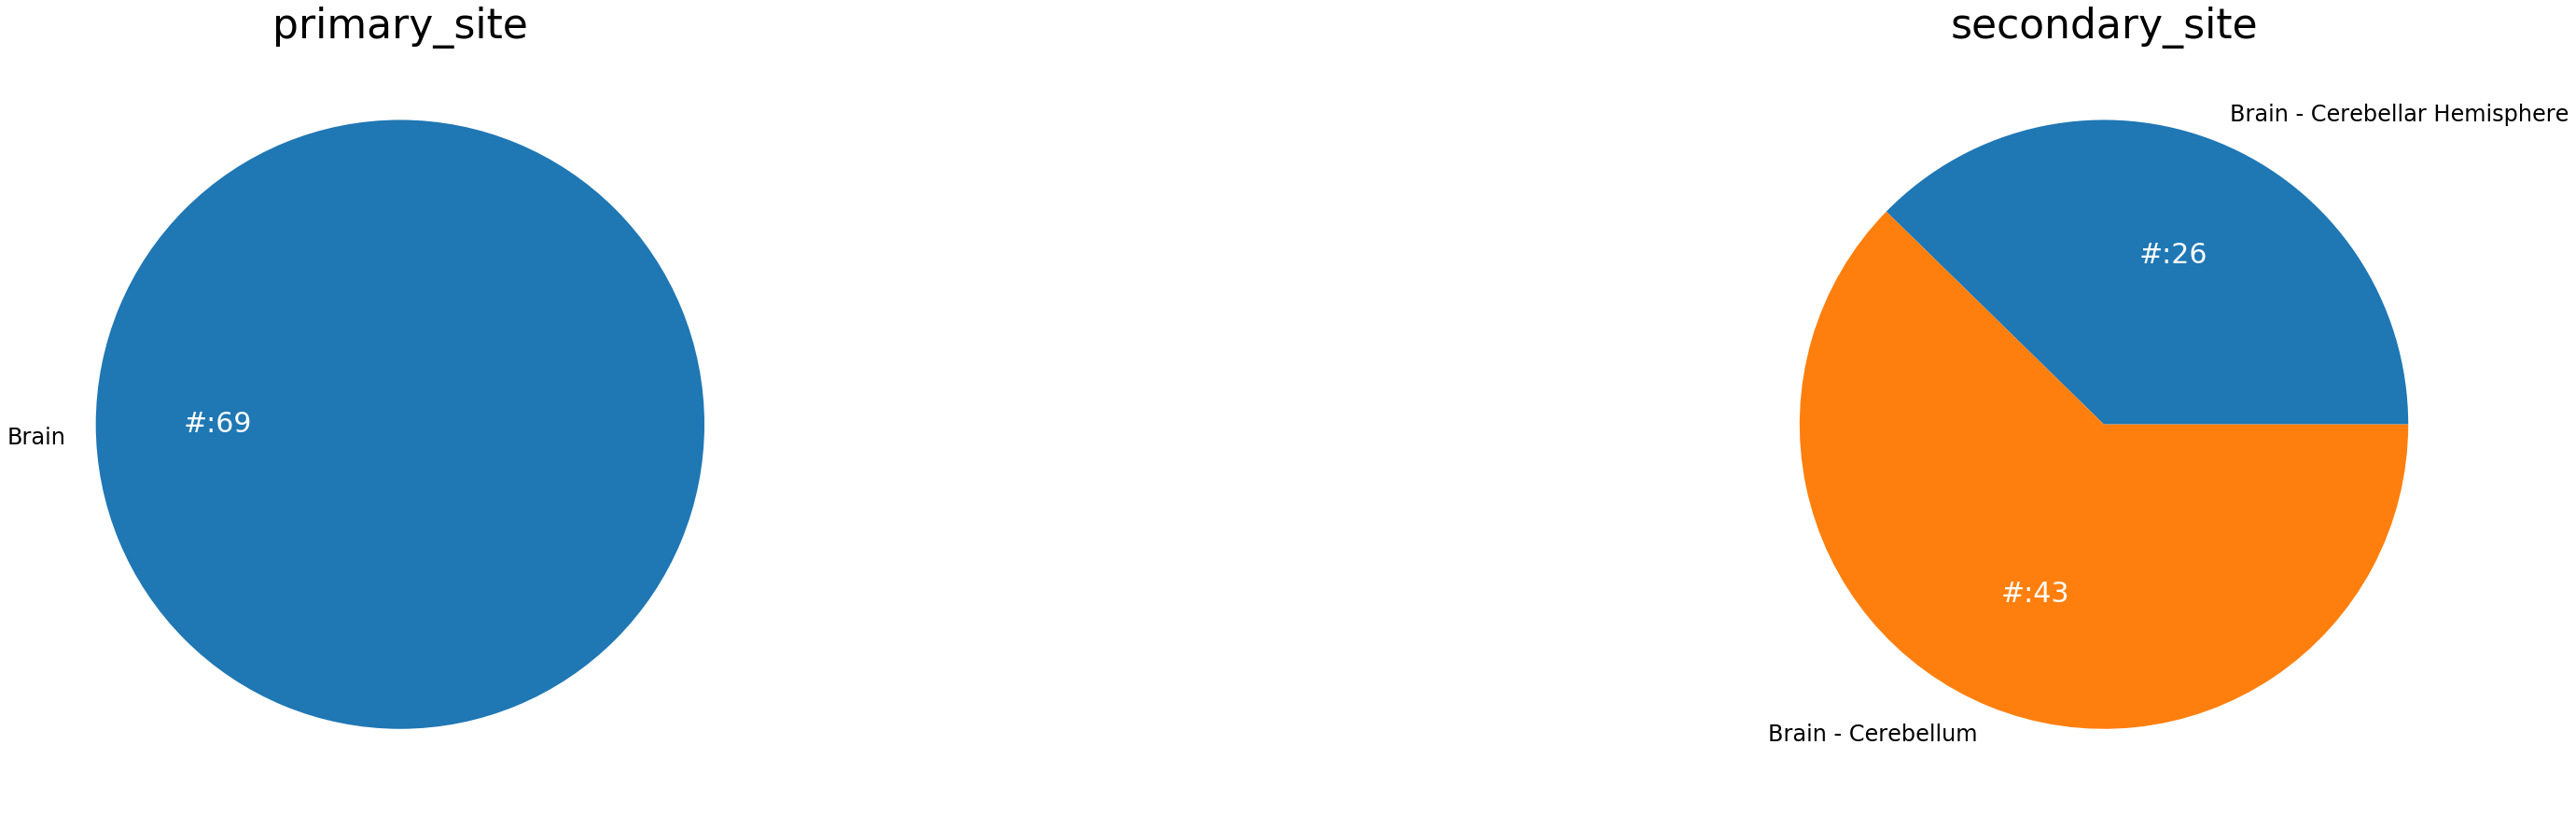

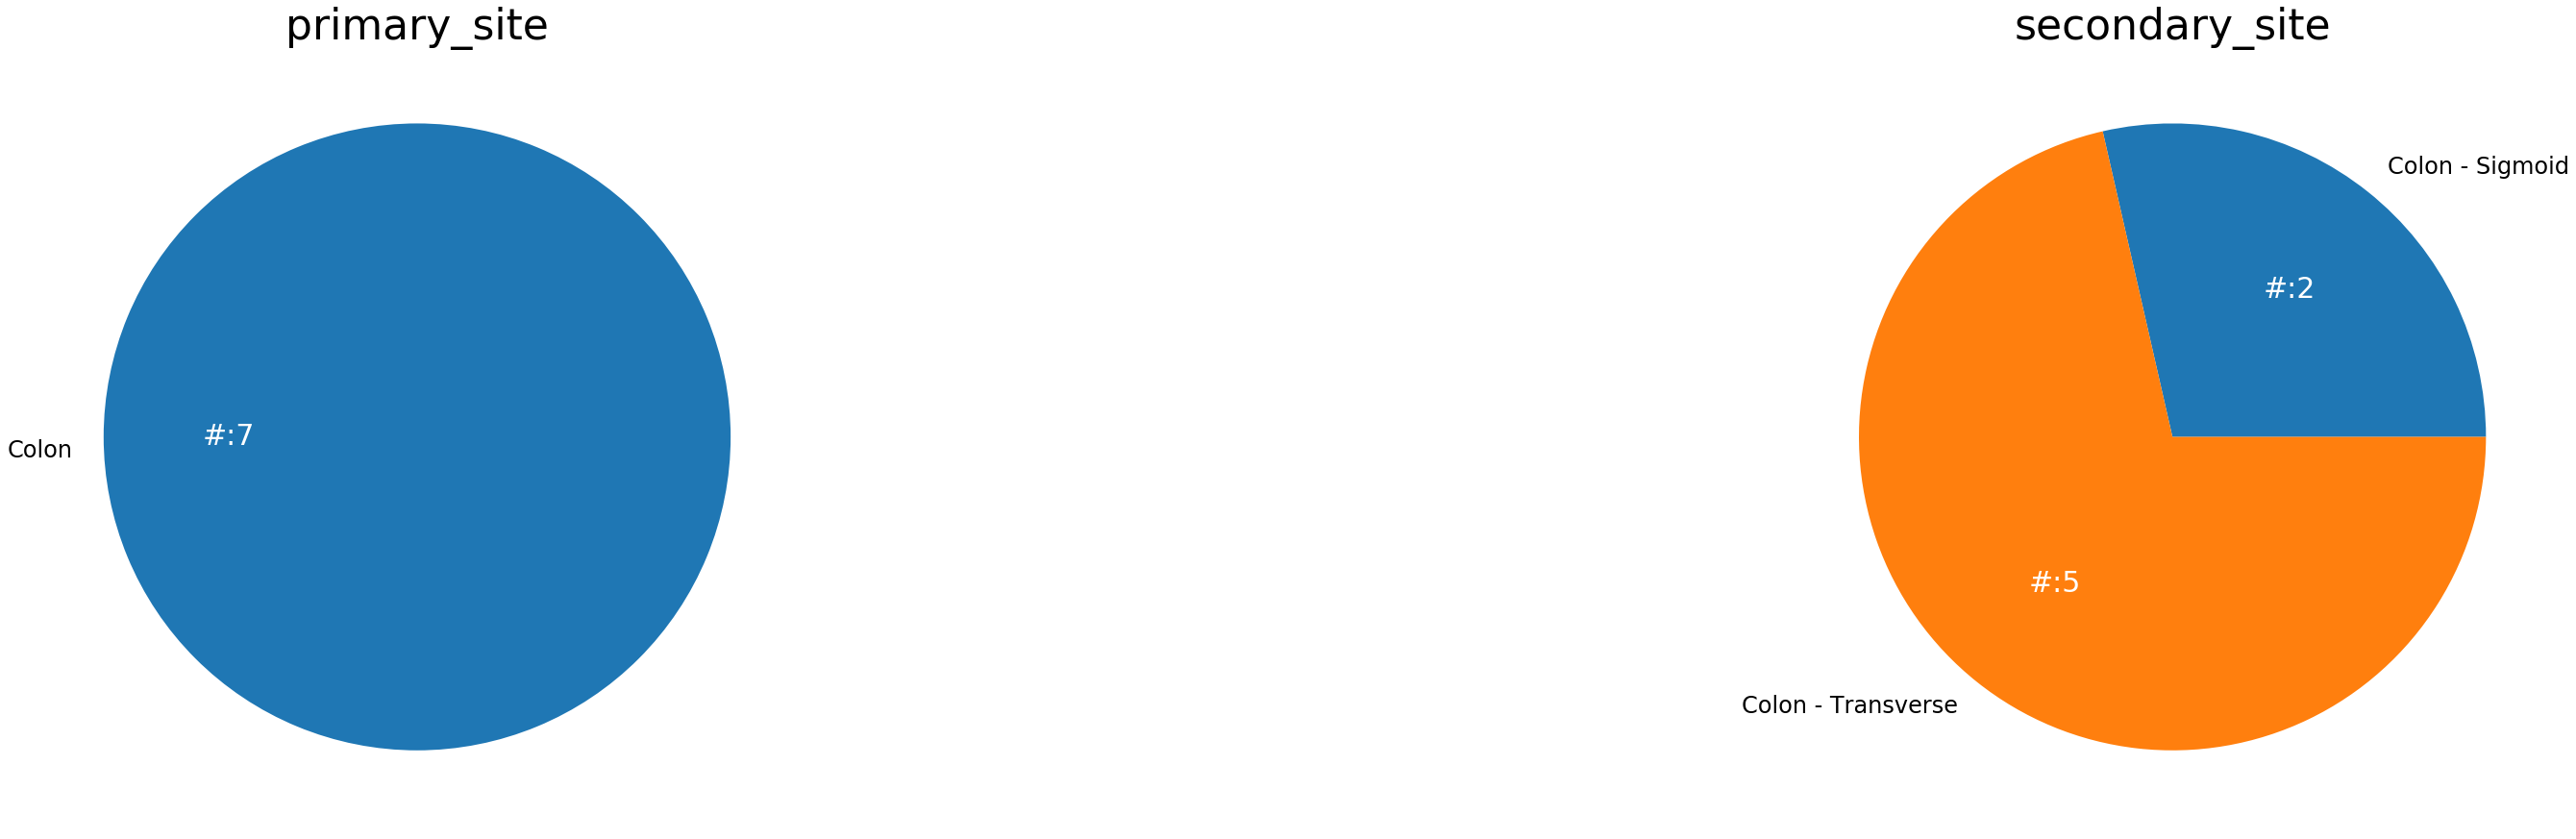

In [43]:
for i in range(len(df_clusters.columns)):
    print(df_clusters.columns[i])
    makePie(df_clusters,level,i+1)
    if i >= 5-1:
        break

In [186]:
normalise = False

In [187]:
def plot_cluster_composition(fraction_sites, directory, l, normalise=False, label='primary_site'):
    df_clusters = pd.read_csv("%s/topsbm/topsbm_level_%d_clusters.csv"%(directory, l), header=[0])
    x = np.arange(1,1+len(df_clusters.columns))
    bottom = np.zeros(len(x))
    ymax = 0
    fig=plt.figure(figsize=(15,8))
    for site, data in fraction_sites.items():
        if np.max(data) == 0:
            continue
        plt.bar(x,data,label=site, bottom=bottom)
        bottom=bottom+data
    plt.xlabel("cluster", fontsize=16)
    if normalise:
        plt.ylabel("fraction of %s"%label, fontsize=16)
    else:
        plt.ylabel("# of %s"%label, fontsize=16)
    plt.title("%s distribution across clusters"%label, fontsize=16)
    plt.legend(ncol=2)
    plt.xticks(x)
    plt.show()
    fig.savefig("%s/%sclustercomposition_l%d_%s.png"%(directory, "fraction_" if normalise else '', int(level),label))

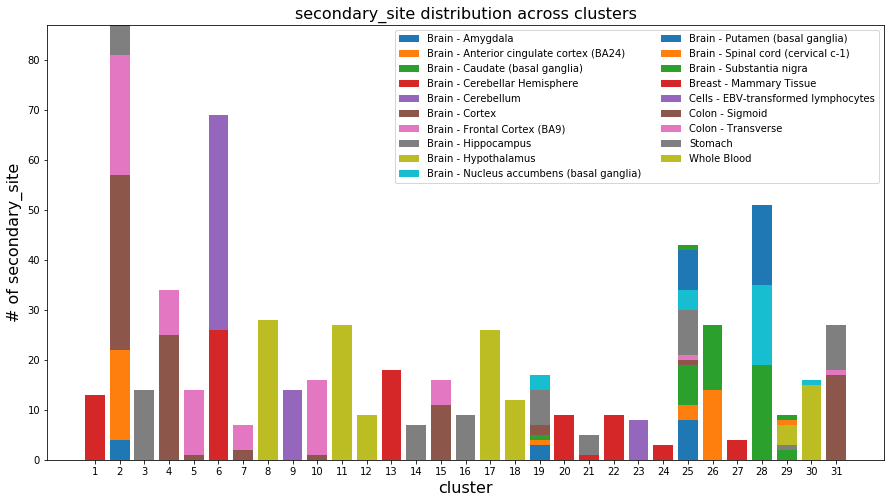

In [188]:
plot_cluster_composition(fraction_sites,directory,level,label=label)

In [189]:
def make_heatmap(fraction_sites):
    found_classes = []
    for site, data in fraction_sites.items():
        if np.max(data) == 0:
            continue
        found_classes.append(site)
        #sns.set(font_scale=2)
    for arr in fraction_sites.values():
        x = len(arr)
        break
    x = np.arange(1,1+x)
    heatmap = sns.heatmap(pd.DataFrame(data=fraction_sites).loc[:,found_classes].transpose(), vmin=0, cmap= "RdYlBu_r", xticklabels=x)
    fig = heatmap.get_figure()
    fig.savefig("%s/heatmap_cluster%s_l%d_%s.png"%(directory,"fraction_" if normalise else '', int(level),label))

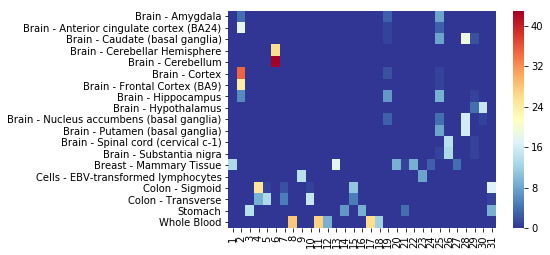

In [190]:
make_heatmap(fraction_sites)

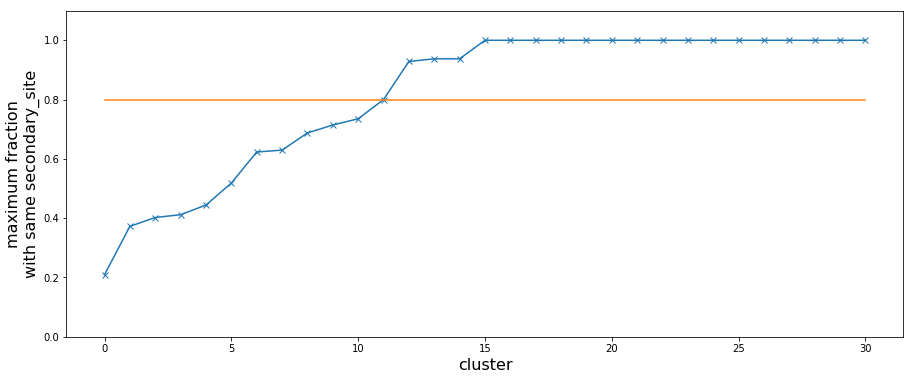

In [191]:
fig=plt.figure(figsize=(15,6))
plt.plot(np.sort(np.array(clustersinfo['maximum'])[:,0].astype(float)), marker='x')
plt.plot(np.arange(len(cluster)),[0.8 for i in range(len(cluster))], visible=True)
plt.xlabel("cluster", fontsize=16)
plt.ylabel("maximum fraction\nwith same %s"%label, fontsize=16)
plt.ylim((0,1.1))
plt.show()
fig.savefig("%s/cluster_maximum_l%d_%s.png"%(directory, level,label))

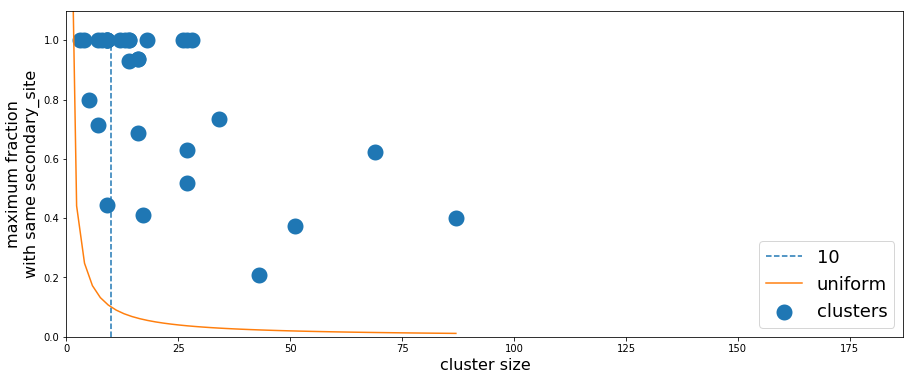

In [192]:
fig=plt.figure(figsize=(15,6))
x = np.array(clustersinfo['sizes']).astype(int)
y = np.array(clustersinfo['maximum'])[:,0].astype(float)
plt.scatter(x,y, lw=10, label='clusters')
plt.plot([10 for _ in range(10)],np.linspace(0,1,10), ls='--', label=10)
plt.plot(np.linspace(0.5,x.max()),1./np.linspace(0.5,x.max()), label='uniform')
plt.xlabel("cluster size", fontsize=16)
plt.ylabel("maximum fraction\nwith same %s"%label, fontsize=16)
plt.ylim((0,1.1))
plt.xlim(0,np.max(x)+100)
plt.legend(loc='lower right', fontsize=18)
plt.show()
fig.savefig("%s/clusterhomosize_l%d_%s.png"%(directory, level,label))

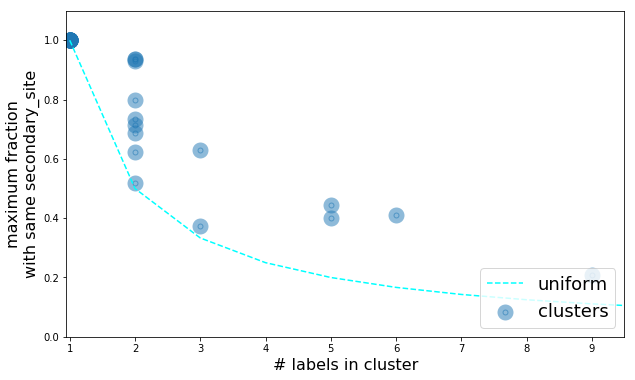

In [193]:
fig=plt.figure(figsize=(10,6))
x = np.array(clustersinfo['nclasses']).astype(int)
y = np.array(clustersinfo['maximum'])[:,0].astype(float)
plt.scatter(x,y, lw=10, alpha=0.5, label='clusters')
plt.plot(np.arange(1,np.max(x)+2),1./np.arange(1,np.max(x)+2),ls='--',c='cyan', label='uniform')
plt.xlabel("# labels in cluster", fontsize=16)
plt.ylabel("maximum fraction\nwith same %s"%label, fontsize=16)
plt.ylim((0,1.1))
plt.xlim(0.95,np.max(x)+0.5)
plt.legend(loc='lower right', fontsize=18)
plt.show()
fig.savefig("%s/cluster_homon_l%d_%s.png"%(directory, level,label))

In [194]:
scores = {
    'primary_site':{
        'h':[],
        'c':[],
        'V':[]
    },
    'secondary_site':{
        'h':[],
        'c':[],
        'V':[]
    }
}
for label in ['primary_site', 'secondary_site']:
    for l in np.arange(L):
        print(l)
        true_labels, predicted_labels = define_labels(get_cluster_given_l(l, directory), label=label)
        _, labels_true = np.unique(true_labels,return_inverse=True)
        scores[label]['h'].append(metrics.cluster.homogeneity_score(labels_true, predicted_labels))
        scores[label]['c'].append(metrics.cluster.completeness_score(labels_true, predicted_labels))
        scores[label]['V'].append(metrics.cluster.v_measure_score(labels_true, predicted_labels))

0
1
2
3
0
1
2
3


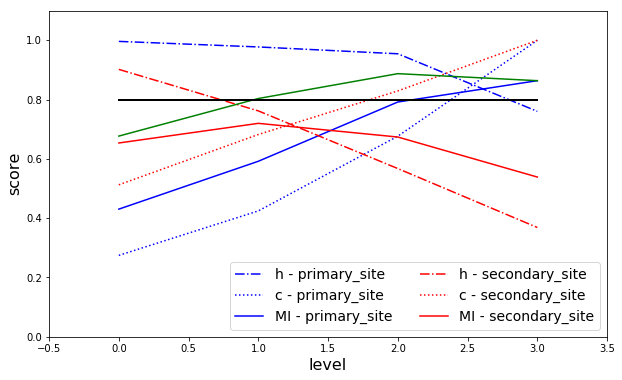

In [195]:
fig=plt.figure(figsize=(10,6))
xl = np.linspace(0,L-1,L)
colors = {
    'primary_site':'blue',
    'secondary_site':'red'
}
for label in ['primary_site', 'secondary_site']:
    plt.plot(xl, scores[label]['h'], label='h - %s'%label, ls='-.', c=colors[label])
    plt.plot(xl, scores[label]['c'], label='c - %s'%label, ls=':', c=colors[label])
    plt.plot(xl, scores[label]['V'], label='MI - %s'%label, ls='-', c=colors[label])
h = np.array(scores['primary_site']['h'])
c = np.array(scores['secondary_site']['c'])
plt.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.plot(xl,[0.8 for _ in xl], lw=2, ls='-', c='black')
plt.xlabel("level", fontsize=16)
plt.ylabel("score", fontsize=16)
plt.ylim((0,1.1))
plt.xlim(-0.5,L-1+0.5)
plt.legend(loc='lower right', ncol=2, fontsize=14)
plt.show()
fig.savefig("%s/cluster_scores_l%d_%s.png"%(directory, level,label))

## Random

In [196]:
fraction_sites_shuffle = get_fraction_sites(cluster, pd.read_csv("files.dat.shuf", index_col=[0]))
clustersinfo_shuffle = get_clustersinfo(cluster, fraction_sites_shuffle)

In [197]:
df=pd.read_csv("files.dat.shuf", index_col=[0])
len(df[df['primary_site']=='Brain'])

319

In [198]:
df=pd.read_csv("files.dat.sub", index_col=[0])
len(df[df['primary_site']=='Brain'])

319

In [199]:
fraction_sites

{'Adipose - Subcutaneous': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Adipose - Visceral (Omentum)': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Adrenal Gland': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Artery - Aorta': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Artery - Coronary': [0.0,
  0.0,


In [200]:
fraction_sites_shuffle

{'Blood': [2.0,
  14.0,
  4.0,
  8.0,
  3.0,
  14.0,
  0.0,
  9.0,
  1.0,
  6.0,
  6.0,
  3.0,
  3.0,
  0.0,
  1.0,
  0.0,
  4.0,
  0.0,
  3.0,
  2.0,
  2.0,
  1.0,
  3.0,
  0.0,
  9.0,
  8.0,
  0.0,
  11.0,
  2.0,
  1.0,
  4.0],
 'Brain': [8.0,
  51.0,
  4.0,
  17.0,
  8.0,
  35.0,
  4.0,
  14.0,
  6.0,
  6.0,
  14.0,
  4.0,
  9.0,
  5.0,
  7.0,
  6.0,
  12.0,
  9.0,
  9.0,
  3.0,
  1.0,
  4.0,
  3.0,
  3.0,
  18.0,
  12.0,
  1.0,
  22.0,
  4.0,
  8.0,
  12.0],
 'Breast': [2.0,
  7.0,
  3.0,
  1.0,
  1.0,
  3.0,
  0.0,
  2.0,
  3.0,
  0.0,
  3.0,
  1.0,
  0.0,
  0.0,
  2.0,
  3.0,
  4.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  7.0,
  1.0,
  1.0,
  7.0,
  0.0,
  1.0,
  3.0],
 'Colon': [0.0,
  11.0,
  2.0,
  5.0,
  2.0,
  12.0,
  2.0,
  2.0,
  2.0,
  4.0,
  3.0,
  1.0,
  2.0,
  2.0,
  5.0,
  0.0,
  4.0,
  3.0,
  3.0,
  4.0,
  0.0,
  3.0,
  0.0,
  0.0,
  7.0,
  6.0,
  2.0,
  6.0,
  1.0,
  5.0,
  6.0],
 'Stomach': [1.0,
  4.0,
  1.0,
  3.0,
  0.0,
  5.0,
  1.0,
  1.0,
  2.0,
  

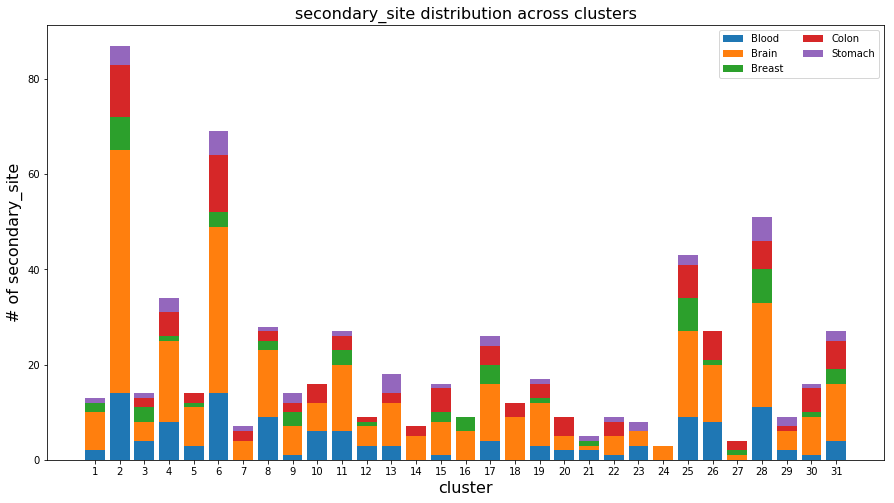

In [201]:
plot_cluster_composition(fraction_sites_shuffle,directory,level, normalise=False, label=label)

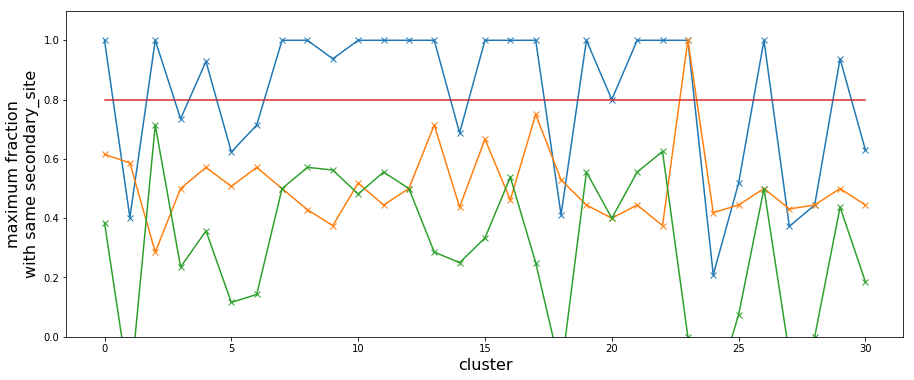

In [202]:
fig=plt.figure(figsize=(15,6))
real = np.array(clustersinfo['maximum'])[:,0].astype(float)
shuffled = np.array(clustersinfo_shuffle['maximum'])[:,0].astype(float)
plt.plot(real, marker='x')
plt.plot(shuffled, marker='x')
plt.plot(real-shuffled, marker='x')
plt.plot(np.arange(len(cluster)),[0.8 for i in range(len(cluster))], visible=True)
plt.xlabel("cluster", fontsize=16)
plt.ylabel("maximum fraction\nwith same %s"%label, fontsize=16)
plt.ylim((0,1.1))
plt.show()
fig.savefig("%s/cluster_shuffle_maximum_l%d_%s.png"%(directory, level,label))

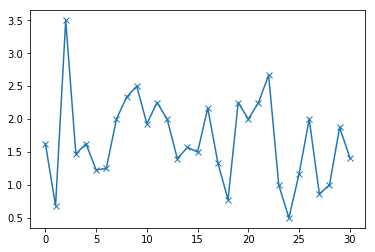

In [203]:
plt.plot(real/shuffled, marker='x')

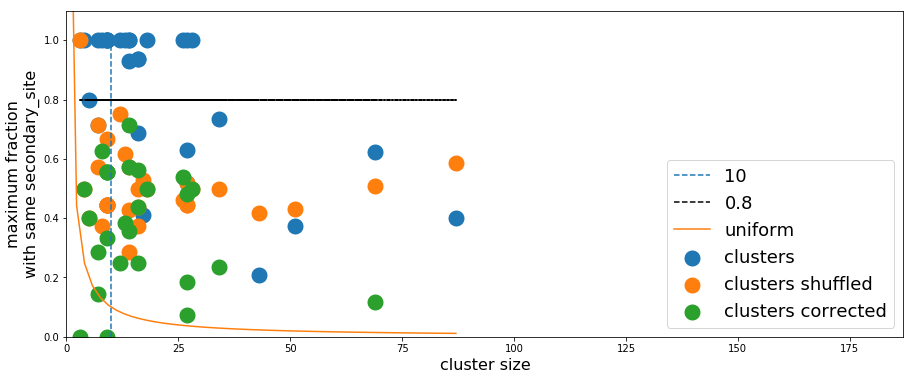

In [204]:
fig=plt.figure(figsize=(15,6))
x = np.array(clustersinfo['sizes']).astype(int)
y = np.array(clustersinfo['maximum'])[:,0].astype(float)
x_shuffle = np.array(clustersinfo_shuffle['sizes']).astype(int)
y_shuffle = np.array(clustersinfo_shuffle['maximum'])[:,0].astype(float)
plt.scatter(x,y, lw=10, label='clusters')
plt.scatter(x_shuffle,y_shuffle, lw=10, label='clusters shuffled')
plt.scatter((x+x_shuffle)/2,y-y_shuffle, lw=10, label='clusters corrected')
plt.plot([10 for _ in range(10)],np.linspace(0,1,10), ls='--', label=10)
plt.plot(x,[0.8 for _ in x], ls='--', label=0.8, c='black')
plt.plot(np.linspace(0.5,x.max()),1./np.linspace(0.5,x.max()), label='uniform')
plt.xlabel("cluster size", fontsize=16)
plt.ylabel("maximum fraction\nwith same %s"%label, fontsize=16)
plt.ylim((0,1.1))
plt.xlim(0,np.max(x)+100)
plt.legend(loc='lower right', fontsize=18)
plt.show()
fig.savefig("%s/cluster_shuffle_homosize_l%d_%s.png"%(directory, level,label))

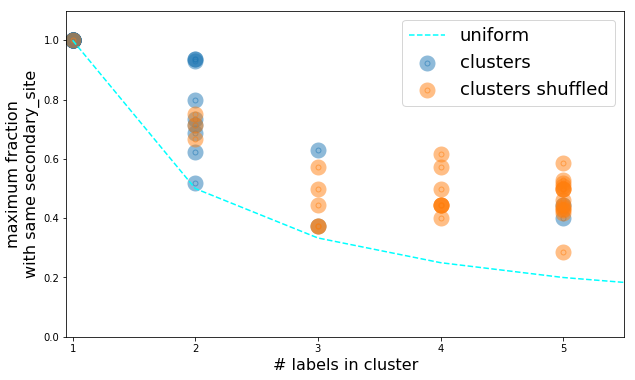

In [205]:
fig=plt.figure(figsize=(10,6))
x = np.array(clustersinfo['nclasses']).astype(int)
y = np.array(clustersinfo['maximum'])[:,0].astype(float)
x_shuffle = np.array(clustersinfo_shuffle['nclasses']).astype(int)
y_shuffle = np.array(clustersinfo_shuffle['maximum'])[:,0].astype(float)
plt.scatter(x,y, lw=10, alpha=0.5, label='clusters')
plt.scatter(x_shuffle,y_shuffle, lw=10, alpha=0.5, label='clusters shuffled')
plt.plot(np.arange(1,np.max(x_shuffle)+2),1./np.arange(1,np.max(x_shuffle)+2),ls='--',c='cyan', label='uniform')
plt.xlabel("# labels in cluster", fontsize=16)
plt.ylabel("maximum fraction\nwith same %s"%label, fontsize=16)
plt.ylim((0,1.1))
plt.xlim(0.95,np.max(x_shuffle)+0.5)
plt.legend(loc='upper right', fontsize=18)
plt.show()
fig.savefig("%s/cluster_shuffle_homon_l%d_%s.png"%(directory, level,label))

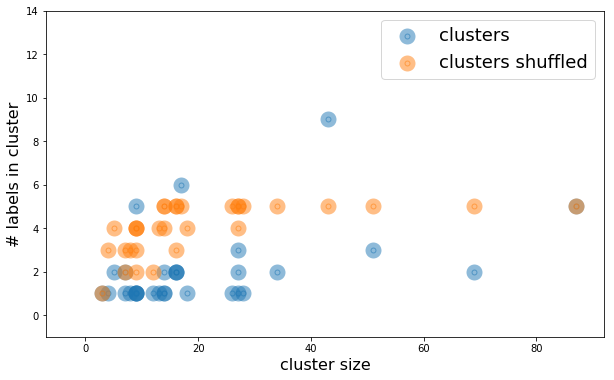

In [206]:
fig=plt.figure(figsize=(10,6))
x = np.array(clustersinfo['sizes']).astype(float)
y = np.array(clustersinfo['nclasses']).astype(int)
x_shuffle = np.array(clustersinfo_shuffle['sizes']).astype(float)
y_shuffle = np.array(clustersinfo_shuffle['nclasses']).astype(int)
plt.scatter(x,y, lw=10, alpha=0.5, label='clusters')
plt.scatter(x_shuffle,y_shuffle, lw=10, alpha=0.5, label='clusters shuffled')
plt.xlabel("cluster size", fontsize=16)
plt.ylabel("# labels in cluster", fontsize=16)
plt.xlim(x.min()-10,x_shuffle.max()+5)
plt.ylim(y.min()-2,y.max()+5)
plt.legend(loc='upper right', fontsize=18)
plt.show()
fig.savefig("%s/cluster_shuffle_label_size_l%d_%s.png"%(directory, level,label))

# Benchmark
https://scikit-learn.org/stable/modules/clustering.html

In [ ]:
labels_true, predicted_labels = define_labels(cluster)

In [ ]:
series_metrics=pd.Series(name=setup+'__level_%d_%s'%(level,label))
series_metrics['MI']=metrics.cluster.normalized_mutual_info_score(labels_true, predicted_labels, average_method='arithmetic')
series_metrics['Homogeneity']=metrics.cluster.homogeneity_score(labels_true, predicted_labels) 
series_metrics['Completness']=metrics.cluster.completeness_score(labels_true, predicted_labels) 
series_metrics['Vmeasure']=metrics.cluster.v_measure_score(labels_true, predicted_labels)
series_metrics['Fowlkes-Mallows']=metrics.cluster.fowlkes_mallows_score(labels_true,predicted_labels)
series_metrics['AdjustedRandIndex']=metrics.cluster.adjusted_rand_score(labels_true,predicted_labels)

In [ ]:
series_metrics

In [ ]:
#df_metrics = pd.DataFrame(columns=['AdjustedRandIndex','MI','Homogeneity','Completness','Vmeasure','Fowlkes-Mallows'])

In [ ]:
try:
    df_metrics.append(series_metrics, ignore_index=False, verify_integrity=True).to_csv("results/hSBM/metrics.csv", index=True,header=True)
except:
    raise

In [ ]:
df_metrics = pd.read_csv("results/hSBM/metrics.csv", index_col=[0],header=[0])
df_metrics.sort_values(by=['MI','Homogeneity'], ascending=False, axis=0, inplace=True)
df_metrics.round(decimals=2)

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(24, 20)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = pd.plotting.table(ax, df_metrics.round(decimals=2), loc='upper right', colWidths=[0.12]*len(df_metrics.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1, 2) # change size table
plt.savefig('results/hSBM/metrics.pdf', transparent=True)

In [ ]:
metrics.cluster.contingency_matrix(true_labels, predicted_labels)

In [ ]:
df_files[df_files['primary_site']=='Brain']